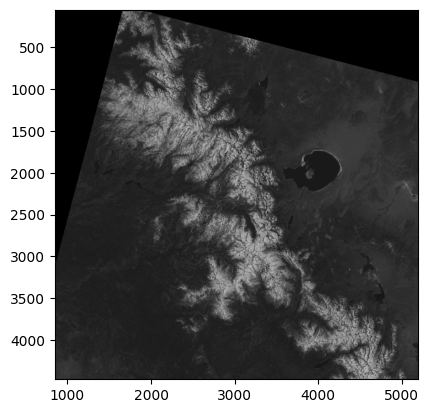

In [1]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from PIL import Image
import requests
from io import BytesIO

class RasterViewer:
    def __init__(self, root):
        self.root = root
        self.root.title("Raster Viewer")

        self.canvas_frame = tk.Frame(self.root)
        self.canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.canvas_frame)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.toolbar_frame = tk.Frame(self.root)
        self.toolbar_frame.pack(side=tk.BOTTOM, fill=tk.X)

        self.load_button = tk.Button(self.toolbar_frame, text="Load Raster", command=self.load_raster)
        self.load_button.pack(side=tk.LEFT, padx=5)

        self.zoom_in_button = tk.Button(self.toolbar_frame, text="Zoom In", command=self.zoom_in)
        self.zoom_in_button.pack(side=tk.LEFT, padx=5)

        self.zoom_out_button = tk.Button(self.toolbar_frame, text="Zoom Out", command=self.zoom_out)
        self.zoom_out_button.pack(side=tk.LEFT, padx=5)

        self.pan_left_button = tk.Button(self.toolbar_frame, text="Pan Left", command=lambda: self.pan(-50, 0))
        self.pan_left_button.pack(side=tk.LEFT, padx=5)

        self.pan_right_button = tk.Button(self.toolbar_frame, text="Pan Right", command=lambda: self.pan(50, 0))
        self.pan_right_button.pack(side=tk.LEFT, padx=5)

        self.pan_up_button = tk.Button(self.toolbar_frame, text="Pan Up", command=lambda: self.pan(0, -50))
        self.pan_up_button.pack(side=tk.LEFT, padx=5)

        self.pan_down_button = tk.Button(self.toolbar_frame, text="Pan Down", command=lambda: self.pan(0, 50))
        self.pan_down_button.pack(side=tk.LEFT, padx=5)

    def load_raster(self):
        file_path = filedialog.askopenfilename(title="Select Raster File", filetypes=[("Raster Files", "*.tif;*.tiff")])
        if file_path:
            raster_data = self.read_raster(file_path)
            self.display_raster(raster_data)

    def read_raster(self, file_path):
        # Use PIL to open local file or download from URL
        if file_path.startswith('http'):
            response = requests.get(file_path)
            image = Image.open(BytesIO(response.content))
        else:
            image = Image.open(file_path)

        raster_data = np.array(image)
        return raster_data

    def display_raster(self, raster_data):
        self.ax.imshow(raster_data, cmap='gray')
        self.canvas.draw()

    def zoom_in(self):
        self.ax.set_xlim(self.ax.get_xlim()[0] * 0.9, self.ax.get_xlim()[1] * 0.9)
        self.ax.set_ylim(self.ax.get_ylim()[0] * 0.9, self.ax.get_ylim()[1] * 0.9)
        self.canvas.draw()

    def zoom_out(self):
        self.ax.set_xlim(self.ax.get_xlim()[0] * 1.1, self.ax.get_xlim()[1] * 1.1)
        self.ax.set_ylim(self.ax.get_ylim()[0] * 1.1, self.ax.get_ylim()[1] * 1.1)
        self.canvas.draw()

    def pan(self, dx, dy):
        self.ax.set_xlim(self.ax.get_xlim()[0] + dx, self.ax.get_xlim()[1] + dx)
        self.ax.set_ylim(self.ax.get_ylim()[0] + dy, self.ax.get_ylim()[1] + dy)
        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = RasterViewer(root)
    root.mainloop()
